In [13]:
import oritelib as orite
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fasta = orite.seq_from_fasta("test_data/pasteurella_multocida.fasta")

In [3]:
print(fasta[0:30])

AATTACTCCTTTCTTGGAAATATAAATACA


In [4]:
len(fasta)

2225237

In [5]:
f0 = fasta
f1 = fasta[500000:]+fasta[0:500000]
f2 = fasta[1000000:]+fasta[0:1000000]
f3 = fasta[2000000:]+fasta[0:2000000]



In [6]:
f0_cum = orite.cumilative_base_count(f0)
f1_cum = orite.cumilative_base_count(f1)
f2_cum = orite.cumilative_base_count(f2)
f3_cum = orite.cumilative_base_count(f3)

In [14]:
np.shape(f0_cum)

(4, 2225237)

In [15]:
f0_cum[0,0:10]

array([1., 2., 2., 2., 3., 3., 3., 3., 3., 3.])

In [75]:
f0_skew = orite.gc_skew_sliding_window(f0, 100000)
f1_skew = orite.gc_skew_sliding_window(f1, 100000)
f2_skew = orite.gc_skew_sliding_window(f2, 100000)
f3_skew = orite.gc_skew_sliding_window(f3, 100000)

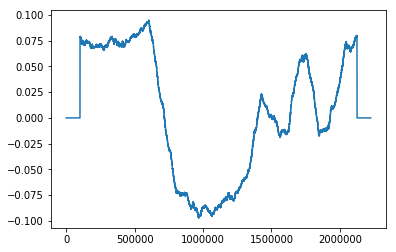

In [76]:
plt.plot(f0_skew)

In [77]:
f0_cum_skew = orite.cumilative_skew(f0_skew)
f1_cum_skew = orite.cumilative_skew(f1_skew)
f2_cum_skew = orite.cumilative_skew(f2_skew)
f3_cum_skew = orite.cumilative_skew(f3_skew)

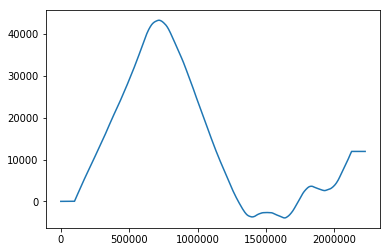

In [78]:
plt.plot(f0_cum_skew)
#plt.savefig("f0.png")

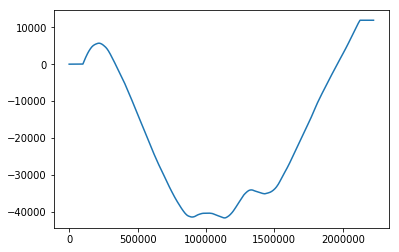

In [79]:
plt.plot(f1_cum_skew)
#plt.savefig("f1.png")

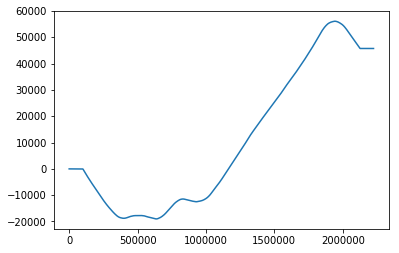

In [80]:
plt.plot(f2_cum_skew)
#plt.savefig("f2.png")

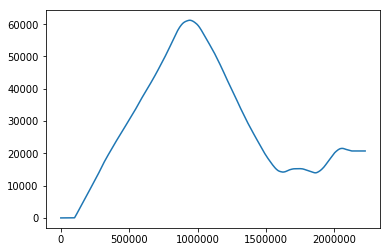

In [81]:
plt.plot(f3_cum_skew)
#plt.savefig("f3.png")

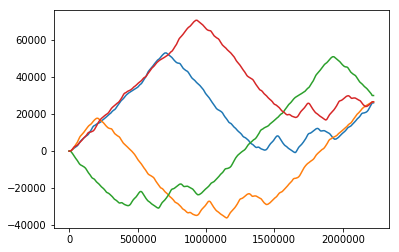

In [26]:
plt.plot(f0_cum_skew)
plt.plot(f1_cum_skew)
plt.plot(f2_cum_skew)
plt.plot(f3_cum_skew)

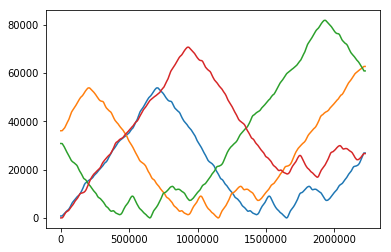

In [38]:
plt.plot(f0_cum_skew-np.min(f0_cum_skew))
plt.plot(f1_cum_skew-np.min(f1_cum_skew))
plt.plot(f2_cum_skew-np.min(f2_cum_skew))
plt.plot(f3_cum_skew-np.min(f3_cum_skew))


In [53]:
max_index = np.argmax(f1_cum_skew)

In [54]:
max_index

2215236

In [55]:
len(f1_cum_skew)

2225237

In [57]:
f1_cum_skew[2215236]

26644.853216371794

In [61]:
f1_cum_skew[2225113]

26644.853216371794

In [31]:
f_max = fasta[max_index:]+fasta[0:max_index]

In [71]:
f_max_cum_skew =orite.gc_skew_sliding_window(f_max, 100000)

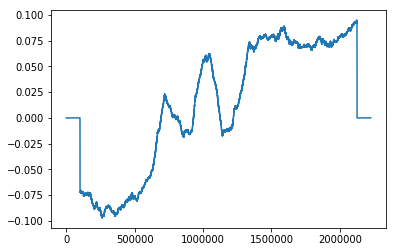

In [72]:
plt.plot(f_max_cum_skew)

In [73]:
test = orite.cumilative_skew(f_max_cum_skew)

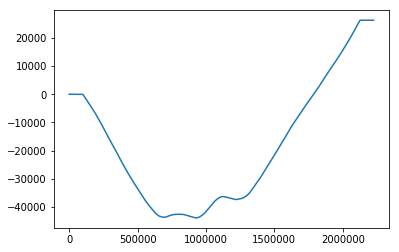

In [74]:
plt.plot(test)

In [68]:
def cgc_from_max(f):
    f = f + f[0:int(len(f)/2)]
    skew = orite.gc_skew_sliding_window(f, 10000)
    cum_skew = orite.cumilative_skew(skew)
    
    max_indx = np.argmax(cum_skew)
    
    new = f[max_indx:] + f[0:max_indx] 
    new_skew = orite.gc_skew_sliding_window(new, 10000)
    return orite.cumilative_skew(new_skew)
    

In [69]:
x0 = cgc_from_max(f0)
x1 = cgc_from_max(f1)
x2 = cgc_from_max(f2)
x3 = cgc_from_max(f3)

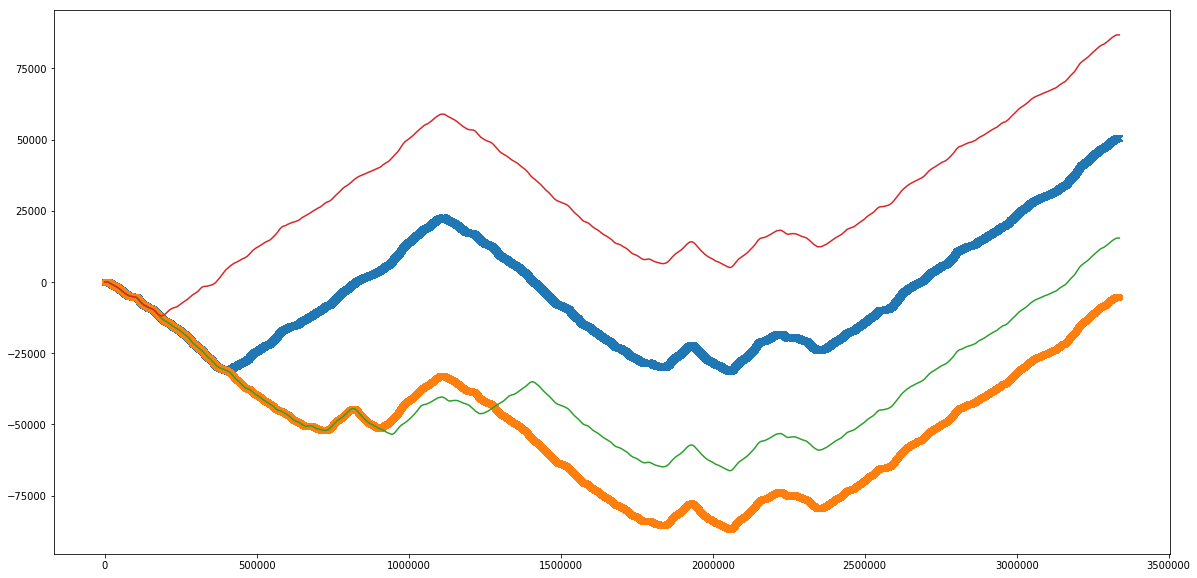

In [70]:
plt.figure(figsize=[20,10])
plt.plot(x0, 'x')
plt.plot(x1, 'o')
plt.plot(x2, '-')
plt.plot(x3)

In [64]:
x = 3.3
np.floor(x)


3.0

In [67]:
a = [3,4,5,6,7,8,9]

a[1:int(x)]

[4, 5]